## Clustering RNA-Sqe(HiSqe) using Unsupervised Learning

- Goal: randomly extraction of gene expressions of patients having different types of tumor: BRCA, KIRC, COAD, LUAD and PRAD


In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

### Read and inspect data into tabular

In [2]:
data = pd.read_csv('data-1.csv')
y_true = pd.read_csv('labels.csv')
data.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


### Exploring and cleaning dataset

In [3]:
# drop the first columns features in samples because it's string
data = data.drop(columns=["Unnamed: 0"])

# check data
# data = data.describe()[data.describe().columns[0:]].round(2)
pd.DataFrame(data)

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [4]:
# check if there are any NaN in samples
data.isnull().values.any()

False

In [5]:
# drop 1st columns in labels
y_true = y_true.drop(columns=["Unnamed: 0"])
y_true

,Class
0,PRAD
1,LUAD
2,PRAD
3,PRAD
4,BRCA
...,...
796,BRCA
797,LUAD
798,COAD
799,PRAD


In [6]:
# check how many class 
np.unique(y_true)


array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype=object)

In [7]:
y_true.isnull().values.any()

False

### Data Standardization (normalization) 
- as preprocessing to help the features are scaled and transformed to have mean 0 (centured around 0) and deviation of 1 since this dataset is not currently standardlized yet because some gene values is high and some is small

In [8]:

# Standardizing data
scaler = np.asarray(data)
gene_data_scaled = StandardScaler()

# # fit and transform data 
gene_data_scaled = gene_data_scaled.fit_transform(scaler)
gene_data_scaled = pd.DataFrame(gene_data_scaled)
gene_data_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,20521,20522,20523,20524,20525,20526,20527,20528,20529,20530
0,-0.194799,-0.828030,0.159800,-1.948277,1.221575,0.0,-0.207968,0.180910,-0.125376,-0.065633,...,-1.300200,-0.921755,-0.877838,0.996247,-1.166072,0.389441,-0.869566,-1.187938,-0.116483,-0.261901
1,-0.194799,-2.015017,-1.415042,1.353109,-0.376518,0.0,-0.532222,-0.983088,-0.125376,-0.065633,...,-1.747076,-2.392213,-0.831893,0.591649,-2.549598,1.391628,0.623551,-0.342277,-1.656889,-0.261901
2,-0.194799,0.417348,1.156735,0.249807,0.112832,0.0,-0.391297,-0.092995,-0.125376,-0.065633,...,-1.034088,-1.059669,2.248803,0.232601,0.317880,-4.025621,-0.632381,0.886860,-1.855264,-0.261901
3,-0.194799,0.543888,1.326182,-0.099053,0.755741,0.0,0.395348,-0.127831,-0.125376,-0.065633,...,0.241299,0.044905,0.224956,1.719725,-0.263847,-0.521747,-0.793609,0.166174,-1.078941,-0.261901
4,-0.194799,-0.295955,-0.257107,-0.286413,-0.148843,0.0,-0.757118,-0.273165,-0.125376,-0.065633,...,0.133335,0.208252,0.837739,0.979924,0.196645,0.268992,-1.615841,-0.229878,-0.201588,-0.261901


### Method 1: Perform KMeans
- perform KMeans Cluster on data then plot with PCA and evaluate Kmeans with 2 metrics
    - Kmeans help finding the optimal centroid for each cluster so that each data point is classified to belong to the cluster by closest centroid
    - fit():compute km but doesnt immediately need to know which cluster each sample belong to. Cal centroid and store them internally (good for train)
    - fit_predict(): compute the centroids and immediately assign each sample in the dataset to a cluster
    - n_init=10: run 10 times with different centroid seeds, and the best solution in terms of inertia will be choose
    - random_state: Used for initializing the centroids

In [17]:
# fit data into kmeans
kmeans = KMeans(n_clusters=5, n_init=50, random_state=50)
# return  cluster labels for each data points
y_predict = kmeans.fit_predict(data)  

# Retrieves first 20 labels from the fitted model
print("Labels:", y_predict[:20] )
print("Inertia:", kmeans.inertia_)

Labels: [0 4 0 0 2 0 1 0 2 0 2 1 0 2 2 2 4 1 1 0]
Inertia: 17802165.934372347


In [15]:
# encoding the labels into numerical
label_encoder = LabelEncoder()
y_true_numerical = label_encoder.fit_transform(y_true['Class'])
# print out first 20 labels
y_true_numerical[:20]

array([4, 3, 4, 4, 0, 4, 2, 4, 0, 4, 0, 2, 4, 0, 0, 0, 3, 2, 2, 4])

### Compare performance using PCA to visualize Kmeans on raw data vs normalized data
- The plots show the PCA-transformed data, but the colors and cluster labels are determined by the KMeans algorithm
    - The clusters shown are the result of KMeans, but the positions of the points are determined by PCA
- Result showing the normalized data is more overlapping and less clusters distinct
- Result of raw data is more distinct and seperate from each other which showing data points are more similar to each other than to points in other clusters

[0 1 2 3 4]


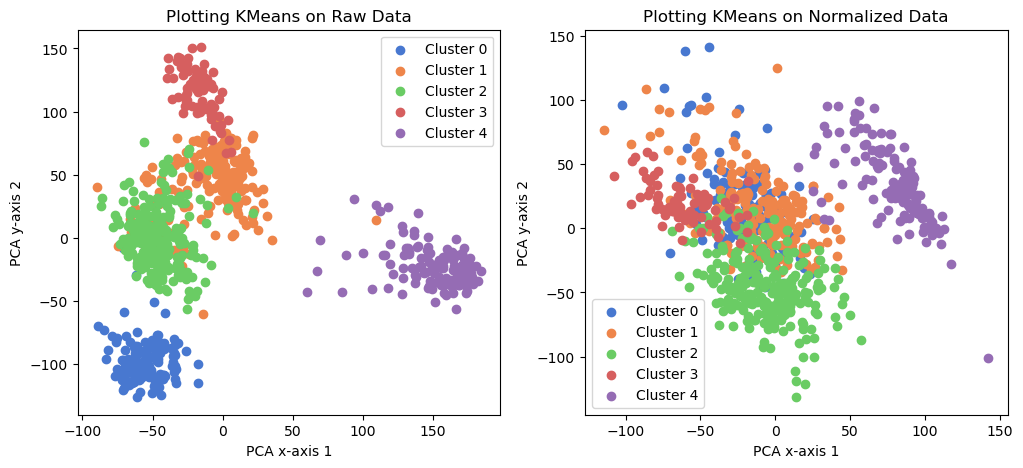

In [81]:

# perform PCA and transform the raw data
pca = PCA(n_components=2)
df = pca.fit_transform(data)
df.shape

#tranform the normalized data
df_scale = pca.fit_transform(gene_data_scaled)

#Getting unique labels for debug
u_labels = np.unique(y_predict)
print(u_labels)

# Pick template to plotting: 2D PCA
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5)) 
palette = sns.color_palette("muted")

# Plotting Kmeans on raw data
for i, color in zip(u_labels, palette):
    axes[0].scatter(df[y_predict == i , 0], df[y_predict == i , 1], color=color, label=f"Cluster {i}")
    axes[0].set_title('Plotting KMeans on Raw Data')
    axes[0].set_xlabel('PCA x-axis 1')
    axes[0].set_ylabel('PCA y-axis 2')
    axes[0].legend()

# Plotting Kmeans on normalized data
for i, color in zip(u_labels, palette):
    axes[1].scatter(df_scale[y_predict == i , 0], df_scale[y_predict == i , 1], color=color, label=f"Cluster {i}")
    axes[1].set_title('Plotting KMeans on Normalized Data')
    axes[1].set_xlabel('PCA x-axis 1')
    axes[1].set_ylabel('PCA y-axis 2')
    axes[1].legend()

plt.show()


### Evaluate Kmeans with adjust rand index (ARI) and normalized muatual information(nmi)
- they measure the similarity between two cluster, independent of the absolute values of the data. 
- compare how the data points are grouped, not the distance between points in a cluster.

In [18]:
# Evaluate on raw data

ari = adjusted_rand_score(y_true_numerical, y_predict)
print("Adjusted Rand Index:", ari)
nmi = normalized_mutual_info_score(y_true_numerical, y_predict)
print("Normal Mutual information:", nmi)

Adjusted Rand Index: 0.985102851015314
Normal Mutual information: 0.9772510384509806


In [19]:
# Evaluate on normalized data
kmeans_scale = KMeans(n_clusters=5, n_init=50, random_state=50)
cluster_scale = kmeans_scale.fit_predict(gene_data_scaled)  
y_predict = kmeans_scale.labels_

ari_scale = adjusted_rand_score(y_true_numerical, y_predict)
print("Adjusted Rand Index:", ari_scale)
nmi_scale = normalized_mutual_info_score(y_true_numerical, y_predict)
print("Normal Mutual information:", nmi_scale)

Adjusted Rand Index: 0.8000619110645553
Normal Mutual information: 0.8562237212690396


## Method 2:
- Apply PCA, T-SNE for dimensional reduction before apply clustering algorighm 
- Then evaluate on each reduction
- The result is KMeans Clusters on PCA Plot identified by KMeans is quite distinct from each other and do not perfectly match with the true label clusters in the plot on the left. 


Explained variation per principal component: [0.1583855 0.1050396]


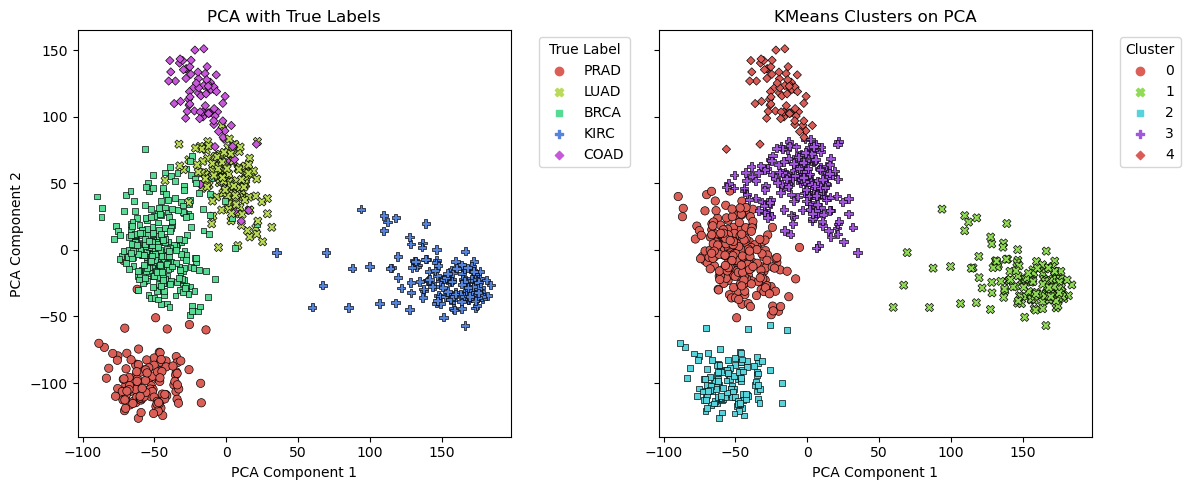

In [51]:

# Perform PCA
pca = PCA(n_components=2)
# X_pca = pca.fit_transform(gene_data_scaled)
X_pca = pca.fit_transform(data)
X_pca_df = pd.DataFrame(X_pca, columns=['PCA Component 1', 'PCA Component 2'])
X_pca_df['True Label'] = y_true  # Add true labels for visualization

# telling how much percent variation in the intire data is cover
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

# Perform K-means clustering on the PCA results
kmeans_pca = KMeans(n_clusters=5, n_init=10, random_state=50)
# 2D PCA
X_pca_df['Cluster'] = kmeans_pca.fit_predict(X_pca)  # Use the PCA results directly 
clusters_predict = X_pca_df['Cluster']

# Set up the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot PCA results with true labels
sns.scatterplot(ax=axes[0], data=X_pca_df, x='PCA Component 1', y='PCA Component 2', hue='True Label', style='True Label',
                palette='hls', edgecolor='k', alpha=1)
axes[0].set_title('PCA with True Labels')
axes[0].legend(title='True Label', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot KMeans Clusters on PCA results
sns.scatterplot(ax=axes[1], data=X_pca_df, x='PCA Component 1', y='PCA Component 2', hue='Cluster', style='Cluster',
                palette='hls', edgecolor='k', alpha=1)
axes[1].set_title('KMeans Clusters on PCA')
axes[1].legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


### Evaluation Kmeans On PCA 
- This indicates that KMeans is grouping the data quite differently than the true labels.

In [52]:

# Evaluate kmeans on pca with Rand Index and Normalized Mutual Information
ari = adjusted_rand_score(y_true_numerical, clusters_predict)  
nmi = normalized_mutual_info_score(y_true_numerical, clusters_predict)
print('Adjusted Rand Index:', ari)
print('Normalized Mutual Information:', nmi)

Adjusted Rand Index: 0.8071999590617023
Normalized Mutual Information: 0.8418199226090637


## Utilize t-SNE then apply Kmeans on T-SNE

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 801 samples in 0.039s...
[t-SNE] Computed neighbors for 801 samples in 0.362s...
[t-SNE] Computed conditional probabilities for sample 801 / 801
[t-SNE] Mean sigma: 76.731214
[t-SNE] KL divergence after 250 iterations with early exaggeration: 43.771622
[t-SNE] KL divergence after 300 iterations: 0.314961


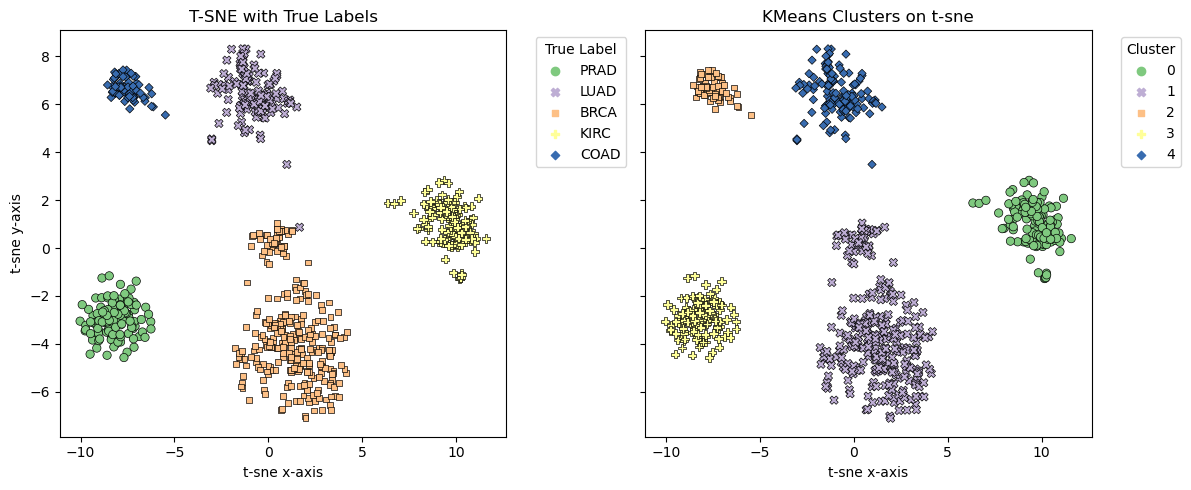

In [73]:
# Perform t-SNE 
tsne = TSNE(n_components=2, verbose=1, learning_rate=100, n_iter=300, perplexity=100, random_state=50)
x_tsne = tsne.fit_transform(data)

# KL divergence to measure how well t-SNE: the smaller number the better performance
# print(f"Length of transformed data: {len(x_tsne)}, KL divergence: {tsne.kl_divergence_}")


X_tsne_df = pd.DataFrame(x_tsne, columns=['t-sne x-axis', 't-sne y-axis'])
X_tsne_df['True Label'] = y_true

# Perform K-means clustering on the tsne results
kmeans_tsne = KMeans(n_clusters=5, n_init=10, random_state=50)
X_tsne_df['Cluster'] = kmeans_tsne.fit_predict(x_tsne)  
clusters_predict = X_tsne_df['Cluster']

# Set up the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot PCA results with true labels
sns.scatterplot(ax=axes[0], data=X_tsne_df, x='t-sne x-axis', y='t-sne y-axis', hue='True Label', style='True Label',
                palette='Accent', edgecolor='k', alpha=1)
axes[0].set_title('T-SNE with True Labels')
axes[0].legend(title='True Label', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot KMeans Clusters on PCA results
sns.scatterplot(ax=axes[1], data=X_tsne_df, x='t-sne x-axis', y='t-sne y-axis', hue='Cluster', style='Cluster',
                palette='Accent', edgecolor='k', alpha=1)
axes[1].set_title('KMeans Clusters on t-sne')
axes[1].legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### Evaluation the performance of Kmeans on t-SNE
- The result indicating a very similar between the true labels on tsne reduction dimention and the KMeans clusters

In [75]:

# Evaluate kmeans on tsne with Rand Index and Normalized Mutual Information
ari = adjusted_rand_score(y_true_numerical, clusters_predict)  
nmi = normalized_mutual_info_score(y_true_numerical, clusters_predict)
print('Adjusted Rand Index on TSNE:', ari)
print('Normalized Mutual Information on TSNE:', nmi)


Adjusted Rand Index on TSNE: 0.9962578040012737
Normalized Mutual Information on TSNE: 0.9947747622537488
